**Juan Hubert - 0706022210013**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Load Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/juanhubertl8010/dataset/refs/heads/main/Bank.csv', delimiter=';')
df.sample(n=10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3015,35,management,married,tertiary,no,0,no,no,cellular,11,jul,89,1,-1,0,unknown,no
1984,56,blue-collar,married,primary,no,551,no,no,unknown,29,may,27,1,-1,0,unknown,no
4355,34,management,single,tertiary,no,-292,yes,no,cellular,19,aug,181,6,-1,0,unknown,no
152,45,unemployed,divorced,primary,yes,-249,yes,yes,unknown,1,jul,92,1,-1,0,unknown,no
3522,54,technician,married,secondary,no,89,yes,no,cellular,10,jul,140,3,-1,0,unknown,no
2822,38,entrepreneur,married,tertiary,no,170,yes,no,cellular,18,may,442,1,-1,0,unknown,yes
2273,44,blue-collar,married,primary,no,-11,yes,no,unknown,9,may,13,1,-1,0,unknown,no
1123,35,technician,married,tertiary,no,188,no,no,cellular,26,aug,286,2,-1,0,unknown,no
3984,44,services,single,secondary,no,1378,yes,no,unknown,8,may,257,2,-1,0,unknown,no
827,32,blue-collar,single,primary,no,882,no,yes,cellular,29,jul,80,8,-1,0,unknown,no


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [3]:
print("Mengecek apakah ada value null di semua kolomnya")
df.info()

Mengecek apakah ada value null di semua kolomnya
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
print("menunjukan statistik deskriptif di kolom yang numerical")
df.describe()

menunjukan statistik deskriptif di kolom yang numerical


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [5]:
print("Menghitung jumlah yes no di dataset")
print(df['y'].value_counts(dropna=False))

Menghitung jumlah yes no di dataset
y
no     4000
yes     521
Name: count, dtype: int64


In [6]:
print("mengecek jumlah 'unknown' di semua kolom")
for column in df.columns:
    unknown_count = df[column].value_counts().get('unknown', 0)
    print(f"Unknown count in '{column}': {unknown_count}")


mengecek jumlah 'unknown' di semua kolom
Unknown count in 'age': 0
Unknown count in 'job': 38
Unknown count in 'marital': 0
Unknown count in 'education': 187
Unknown count in 'default': 0
Unknown count in 'balance': 0
Unknown count in 'housing': 0
Unknown count in 'loan': 0
Unknown count in 'contact': 1324
Unknown count in 'day': 0
Unknown count in 'month': 0
Unknown count in 'duration': 0
Unknown count in 'campaign': 0
Unknown count in 'pdays': 0
Unknown count in 'previous': 0
Unknown count in 'poutcome': 3705
Unknown count in 'y': 0


In [7]:
print("merubah 'unknown' di kolom 'job' ")
df['job'] = df['job'].replace('admin.', 'management')
df.sample(10)

merubah 'unknown' di kolom 'job' 


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1983,34,technician,single,secondary,no,105,yes,no,cellular,7,may,146,2,171,3,failure,no
1108,43,management,single,tertiary,no,146,no,no,cellular,21,nov,50,1,113,5,other,no
4138,36,housemaid,married,secondary,no,2880,no,no,unknown,12,jun,283,1,-1,0,unknown,no
2277,38,technician,married,secondary,no,1931,no,no,cellular,2,jun,167,1,298,10,other,no
2578,42,technician,married,secondary,no,0,no,no,cellular,29,aug,82,12,-1,0,unknown,no
3264,36,management,single,tertiary,no,613,no,no,cellular,7,aug,86,2,-1,0,unknown,no
352,39,management,married,tertiary,no,278,no,yes,cellular,28,jul,60,3,-1,0,unknown,no
394,33,blue-collar,married,secondary,no,43,yes,no,cellular,14,may,332,2,358,2,failure,no
1977,55,management,divorced,tertiary,no,-612,no,no,cellular,26,aug,131,2,-1,0,unknown,no
4147,30,services,married,secondary,no,227,no,yes,unknown,3,jun,23,1,-1,0,unknown,no


<ipython-input-8-199dfe79afa1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='education', data=df, palette='magma')


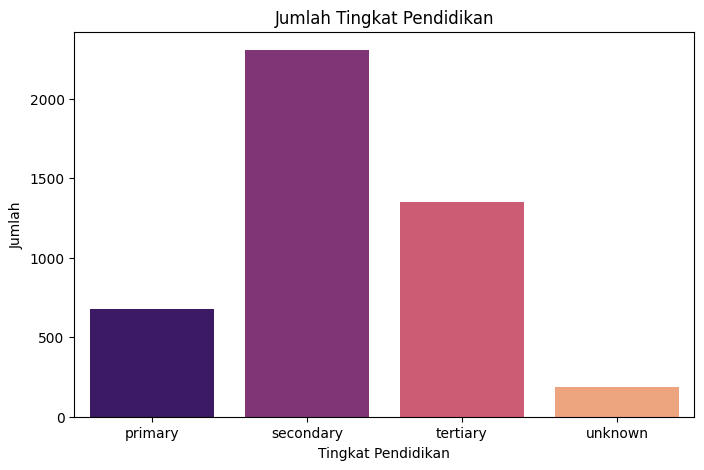

In [8]:
# 1. Plot Bar untuk Tingkat Pendidikan
plt.figure(figsize=(8, 5))
sns.countplot(x='education', data=df, palette='magma')
plt.title('Jumlah Tingkat Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Jumlah')
plt.show()

<ipython-input-9-92e630944283>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette='coolwarm')


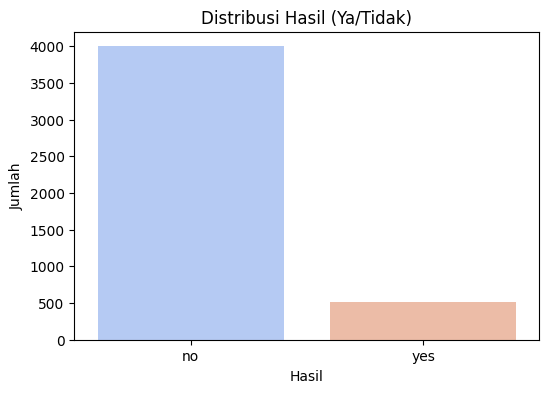

In [9]:
# 2. Plot Bar untuk outcome ('y')
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df, palette='coolwarm')
plt.title('Distribusi Hasil (Ya/Tidak)')
plt.xlabel('Hasil')
plt.ylabel('Jumlah')
plt.show()

In [10]:
label_encoder = LabelEncoder() ## menganti value kategorical menjadi int
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column].astype(str))

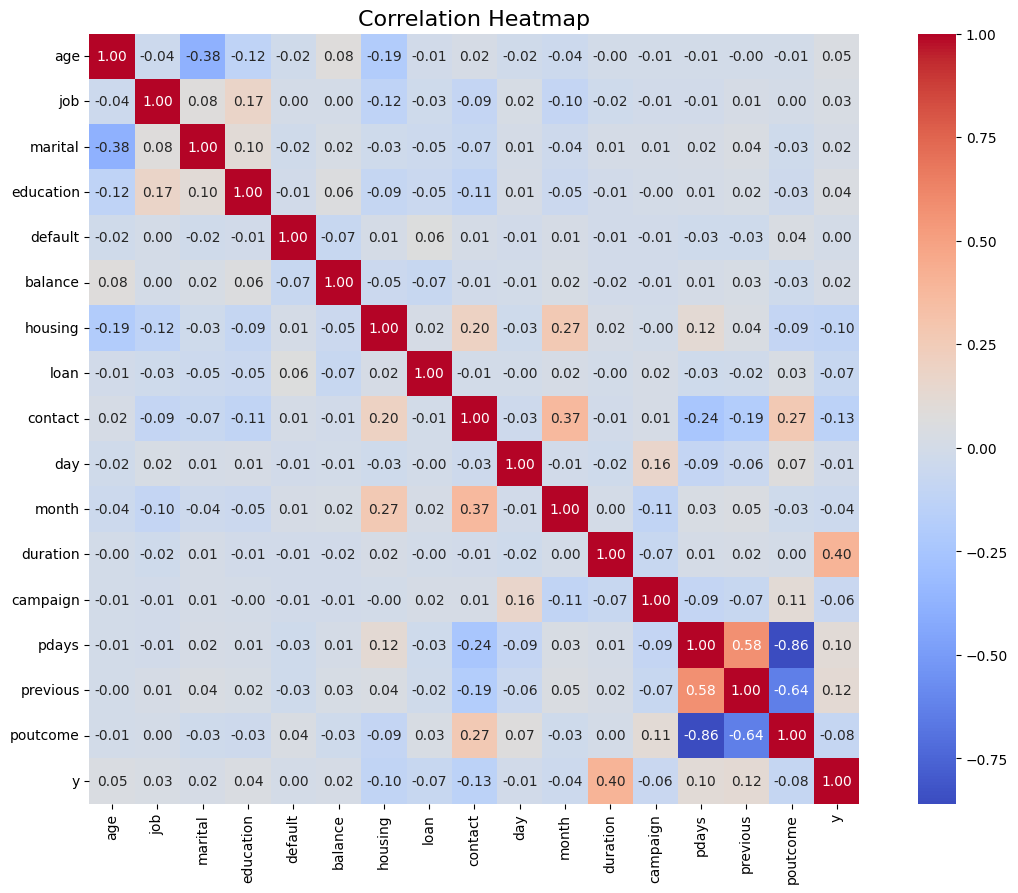

In [11]:
# 3. Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

## Machine Learning (Split Data)

In [12]:
X = df.drop(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'poutcome', 'y'], axis = 1)
y = df['y']

smote_enn = SMOTEENN(random_state=0) # Mengimbangkan jumlah yes/no dalam kolom y

X, y = smote_enn.fit_resample(X, y)

print("Class distribution after SMOTEEN:")
print(y.value_counts())



Class distribution after SMOTEEN:
y
0    2941
1    2266
Name: count, dtype: int64


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [14]:
# A) Defining the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# B) Predict the test set results
y_pred_rf = rf_classifier.predict(X_test)

# C) Check accuracy score
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy}')

# D) Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix Random Forest:")
print(cm_rf)

# E) Classification report
class_report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report Random Forest: \n", class_report_rf)

# F) Results and conclusion
print("Random Forest mampu mengklasifikasikan hampir seluruh instance dengan hanya 10 kesalahan positif dan 0 kesalahan negatif, mengindikasikan performa yang luar biasa di kedua kelas.")
print("Model Random Forest meraih presisi, recall, dan F1-score yang mendekati sempurna untuk kedua kelas, dengan skor yang hampir mencapai 1,00.")


Accuracy: 0.9942418426103646

Confusion Matrix Random Forest:
[[581   6]
 [  0 455]]
Classification Report Random Forest: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       587
           1       0.99      1.00      0.99       455

    accuracy                           0.99      1042
   macro avg       0.99      0.99      0.99      1042
weighted avg       0.99      0.99      0.99      1042

Random Forest mampu mengklasifikasikan hampir seluruh instance dengan hanya 10 kesalahan positif dan 0 kesalahan negatif, mengindikasikan performa yang luar biasa di kedua kelas.
Model Random Forest meraih presisi, recall, dan F1-score yang mendekati sempurna untuk kedua kelas, dengan skor yang hampir mencapai 1,00.


## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [15]:
# A) Defining the model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# B) Predict the test set results
y_pred = gb_model.predict(X_test)

# C) Check accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# D) Confusion matrix
cm_xg = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix XGBoost:")
print(cm_xg)

# E) Classification report
class_report_xg = classification_report(y_test, y_pred)
print("Classification Report Gradient Boosting: \n", class_report_xg)

# F) Results and conclusion
print("Gradient Boosting menghasilkan 16 kesalahan positif dan 7 kesalahan negatif, yang sedikit mengurangi kinerjanya dibandingkan dengan Random Forest.")
print("Model Gradient Boosting tetap menunjukkan presisi dan recall yang tinggi untuk kedua kelas, dengan rata-rata F1-score makro sebesar 0,98, sedikit di bawah Random Forest.")


Accuracy: 0.9788867562380038

Confusion Matrix XGBoost:
[[570  17]
 [  5 450]]
Classification Report Gradient Boosting: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       587
           1       0.96      0.99      0.98       455

    accuracy                           0.98      1042
   macro avg       0.98      0.98      0.98      1042
weighted avg       0.98      0.98      0.98      1042

Gradient Boosting menghasilkan 16 kesalahan positif dan 7 kesalahan negatif, yang sedikit mengurangi kinerjanya dibandingkan dengan Random Forest.
Model Gradient Boosting tetap menunjukkan presisi dan recall yang tinggi untuk kedua kelas, dengan rata-rata F1-score makro sebesar 0,98, sedikit di bawah Random Forest.


In [17]:
# Kesimpulan

print("Model Random Forest lebih unggul dibandingkan Gradient Boosting dalam hal akurasi, presisi, recall, dan F1-score. Meski begitu, kedua model tetap memperlihatkan kinerja yang sangat baik secara keseluruhan.")

Model Random Forest lebih unggul dibandingkan Gradient Boosting dalam hal akurasi, presisi, recall, dan F1-score. Meski begitu, kedua model tetap memperlihatkan kinerja yang sangat baik secara keseluruhan.
